## Give an upvote if you found this notebook helpful

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Let's import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Let's load the datasets

In [ ]:
exercise = pd.read_csv('/kaggle/input/fmendesdat263xdemos/exercise.csv')
calories = pd.read_csv('/kaggle/input/fmendesdat263xdemos/calories.csv')

In [ ]:
exercise.head()

In [ ]:
calories.head()

In [ ]:
# Let's merge both the datasets on USER_ID column

df = pd.merge(exercise, calories, on = 'User_ID')

In [ ]:
df['Intercept'] = 1

If you are wondering about why this Intercept column with value 1 is added. Just be patient now.

In [ ]:
df.head()

### Visualizing our data
As it is obvious that if we workout more then we will loose more calories

In [ ]:
# Visualizing the effect of exercise minutes on calories burned
plt.figure(figsize=(8, 8))
plt.plot(df['Duration'], df['Calories'], 'go');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

#### Now let's create the feature and response variable

In [ ]:
X = df.loc[:, ['Intercept', 'Duration']]
y = df.loc[:, 'Calories']

#### First implementing the linear regression without using any libraries

In [ ]:
def linear_regression(X,y):
    _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return _coeffs

by_hand_coefs = linear_regression(X.values, y.values)
print('Intercept without using library:', by_hand_coefs[0])
print('Slope without using library: ', by_hand_coefs[1])

### Still wondering about the intercept column. See this formula for the explanation

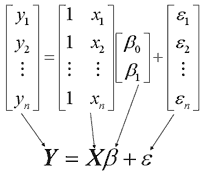

In [ ]:
xs = np.linspace(4, 31, 1000)
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs

plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'go',label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.plot(xs, ys, 'r--', label = 'OLS Fit', linewidth = 3)
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [ ]:
# Let's predict something
print(f'Exercising for 35.5 minutes will burn an estimated \
{np.round((by_hand_coefs[0] + by_hand_coefs[1] * 35.5), 2)} calories')

#### Implementing linear regression with the help of the library

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(np.array(X.Duration).reshape(-1, 1), y)
print('Intercept using library:', linear_regression.intercept_)
print('Slope using library:', linear_regression.coef_[0])

### That's it from this notebook and big shoutout for this amazing tutorial to
https://thecleverprogrammer.com/2020/11/26/calories-burned-prediction-with-python/
